---
layout: post  
---

In [3]:
import Pkg
pkgs = [
    "Eisenia",
    "Random",
    "Revise",
    "BioSequences",
    "Test",
    "LightGraphs",
    "Primes"
]

for pkg in pkgs
    try
        Pkg.add(pkg)
    catch
        # tried to install an unregistered local package
    end
    eval(Meta.parse("import $pkg"))
end

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


  Resolving package versions...
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


In [4]:
n_sequences = 2^0

1

In [5]:
seqlen = 10^1

10

In [6]:
n_observations = 10^2

100

In [7]:
sequences = [BioSequences.randdnaseq(Random.seed!(i), seqlen) for i in 1:n_sequences]

1-element Array{BioSequences.LongSequence{BioSequences.DNAAlphabet{4}},1}:
 TCGTCCCAGG

In [259]:
error_rate = 0.05

0.05

In [260]:
observations = [
    Eisenia.observe(rand(sequences), error_rate = error_rate) for i in 1:n_observations
]

100-element Array{BioSequences.LongSequence{BioSequences.DNAAlphabet{4}},1}:
 CCTGGTACGA
 TCGTCCCAGG
 TCGTCCCAGG
 CCTGGGCGA
 CCTGGGACGA
 CCATGGGGACGA
 TCGTCCCAGG
 CCTGGGACGA
 CCTGGGACGA
 TCGTCCCAGG
 CGTCCCAGG
 TCGTCCCGG
 TCGTCCCAGG
 ⋮
 CCTGGGACGA
 CTCTGGGACGA
 CCTGTGACGA
 TCGTCCCAG
 TCGTCCCAGG
 TCTCCCAGAG
 TCGTCCCAGG
 TCGTCCCAGG
 TCGTCCCAGG
 CCTGGGACGA
 TCGTCCCAGG
 TCGTCCCAGG

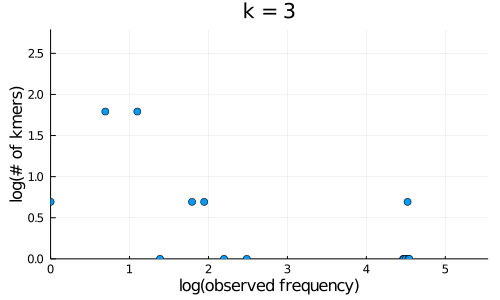

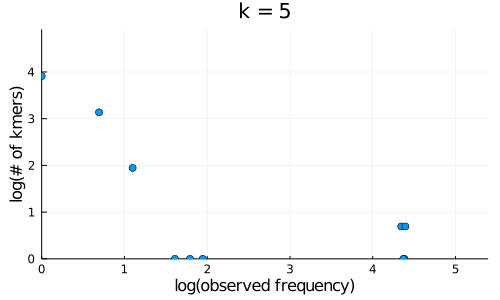

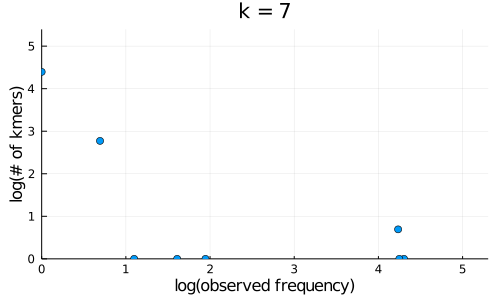

In [261]:
for k in Primes.primes(3, min(seqlen, 31))
    counts = collect(values(Eisenia.count_kmers(BioSequences.DNAMer{k}, observations)))
    display(Eisenia.plot_kmer_frequency_spectra(counts, title = "k = $k", size = (500, 300)))
end

These all seem fine, let's see what the graphs look like for each

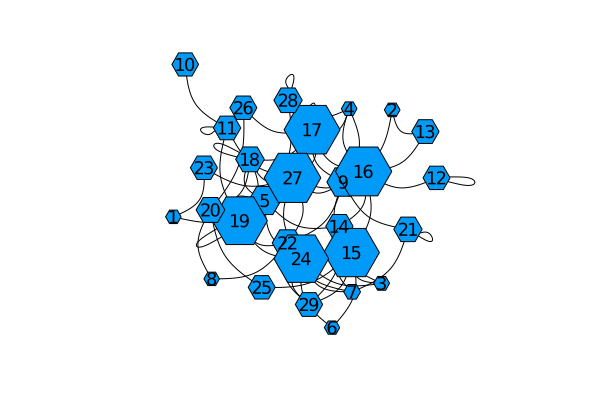

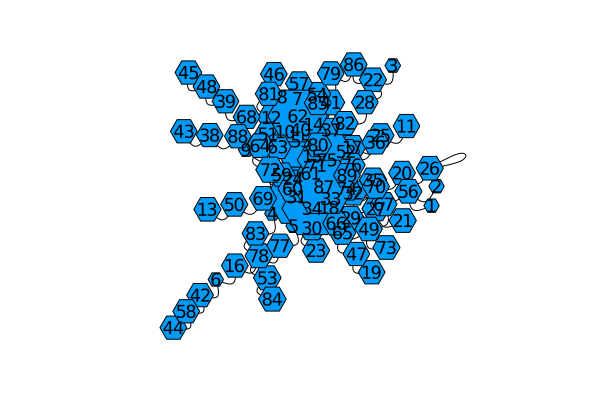

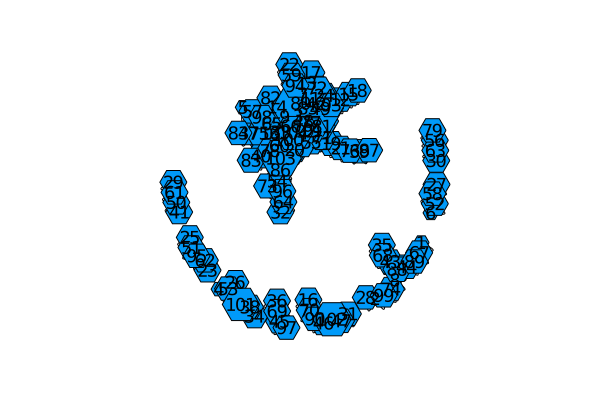

In [275]:
for k in Primes.primes(3, min(seqlen, 31))
    graph = Eisenia.KmerGraph(BioSequences.DNAMer{k}, observations)
    display(Eisenia.plot_graph(graph))
end

Let's go with k = 3. k = 5 seems like it has lots of disjointed tips and k=7 fragments the graphs to the point that there are no overlaps. This suggests that the smallest possible k that can separate signal from noise is ideal

In [263]:
k = 3
graph = Eisenia.KmerGraph(BioSequences.DNAMer{k}, observations)

Eisenia.KmerGraph{BioSequences.Mer{BioSequences.DNAAlphabet{2},3}}({29, 66} undirected simple Int64 graph, Dict{LightGraphs.SimpleGraphs.SimpleEdge{Int64},Array{Eisenia.EdgeEvidence,1}}(Edge 4 => 28 => [Eisenia.EdgeEvidence(1, 4), Eisenia.EdgeEvidence(24, 6), Eisenia.EdgeEvidence(51, 5)],Edge 7 => 21 => [Eisenia.EdgeEvidence(17, 4)],Edge 9 => 27 => [Eisenia.EdgeEvidence(47, 4)],Edge 5 => 18 => [Eisenia.EdgeEvidence(65, 1)],Edge 12 => 16 => [Eisenia.EdgeEvidence(6, 1), Eisenia.EdgeEvidence(6, 3)],Edge 19 => 19 => [Eisenia.EdgeEvidence(23, 8)],Edge 4 => 9 => [Eisenia.EdgeEvidence(24, 5)],Edge 2 => 9 => [Eisenia.EdgeEvidence(31, 8), Eisenia.EdgeEvidence(34, 8)],Edge 24 => 29 => [Eisenia.EdgeEvidence(91, 5)],Edge 5 => 14 => [Eisenia.EdgeEvidence(86, 1)]…), BioSequences.Mer{BioSequences.DNAAlphabet{2},3}[AAC, AAG, ACA, ACC, ACG, ACT, AGA, AGC, AGG, ATA  …  CGC, CTA, CTC, GAA, GAC, GCA, GCC, GGA, GTA, TCA], [2, 3, 4, 3, 92, 1, 9, 2, 94, 1  …  7, 6, 12, 2, 87, 2, 2, 93, 6, 3])

In [265]:
function my_isequal(a, b)
    return (a == b) || (BioSequences.reverse_complement(a) == b)
end

my_isequal (generic function with 1 method)

In [267]:
total_edits_accepted = 0
total_bases_evaluated = 0

0

In [271]:
maximum_likelihood_observations = BioSequences.LongDNASeq[]

BioSequences.LongSequence{BioSequences.DNAAlphabet{4}}[]

In [272]:
for observation in observations
    total_bases_evaluated += length(observation)
    optimal_path, edit_distance, relative_likelihood = Eisenia.viterbi_maximum_likelihood_path(graph, observation, error_rate)
    total_edits_accepted += edit_distance
    maximum_likelihood_observation = Eisenia.oriented_path_to_sequence(optimal_path, graph.kmers)
    push!(maximum_likelihood_observations, maximum_likelihood_observation)
    @show my_isequal(maximum_likelihood_observation, first(sequences))
end

my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = false
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = false
my_isequal(maximum_likelihood_observation, first(sequences)) = false
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, fi

In [273]:
total_edits_accepted / total_bases_evaluated

0.05247524752475247

In [274]:
maximum_likelihood_observations

100-element Array{BioSequences.LongSequence{BioSequences.DNAAlphabet{4}},1}:
 CCTGGGACGA
 TCGTCCCAGG
 TCGTCCCAGG
 CCTGGGACGA
 CCTGGGACGA
 CCAGGGACGA
 TCGTCCCAGG
 CCTGGGACGA
 CCTGGGACGA
 TCGTCCCAGG
 CGTCCCAGG
 TCGTCCCAG
 TCGTCCCAGG
 ⋮
 CCTGGGACGA
 CCCAGGGACGA
 CCTGGGACGA
 TCGTCCCAG
 TCGTCCCAGG
 TGTCCCAGGG
 TCGTCCCAGG
 TCGTCCCAGG
 TCGTCCCAGG
 CCTGGGACGA
 TCGTCCCAGG
 TCGTCCCAGG

In [284]:
observations = maximum_likelihood_observations
maximum_likelihood_observations = BioSequences.LongDNASeq[]

BioSequences.LongSequence{BioSequences.DNAAlphabet{4}}[]

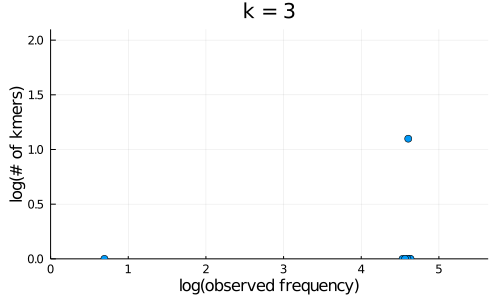

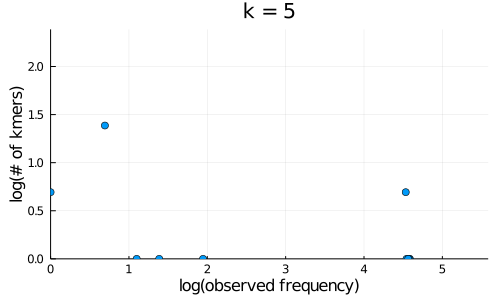

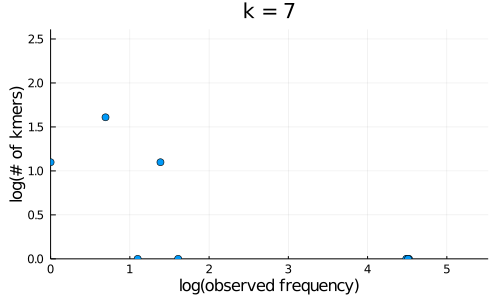

In [285]:
for k in Primes.primes(3, min(seqlen, 31))
    counts = collect(values(Eisenia.count_kmers(BioSequences.DNAMer{k}, observations)))
    display(Eisenia.plot_kmer_frequency_spectra(counts, title = "k = $k", size = (500, 300)))
end

These all seem fine, let's see what the graphs look like for each

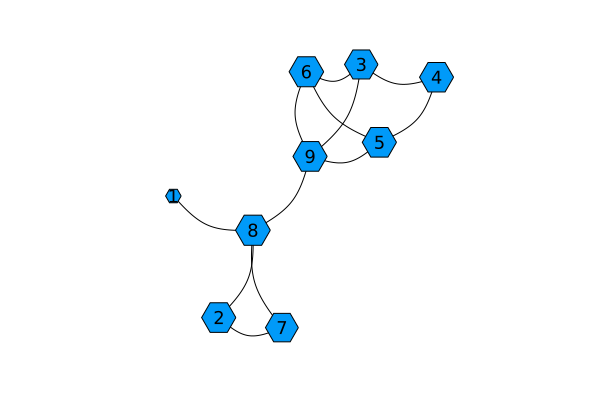

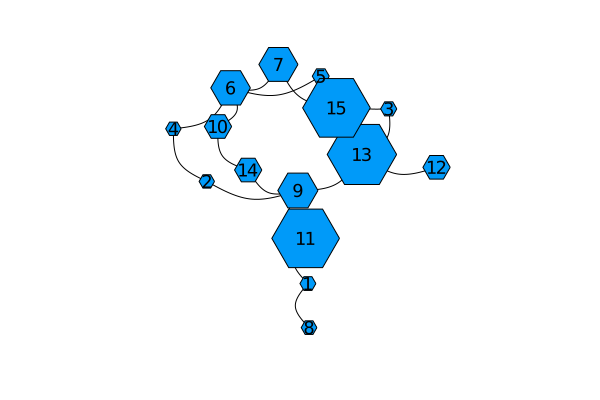

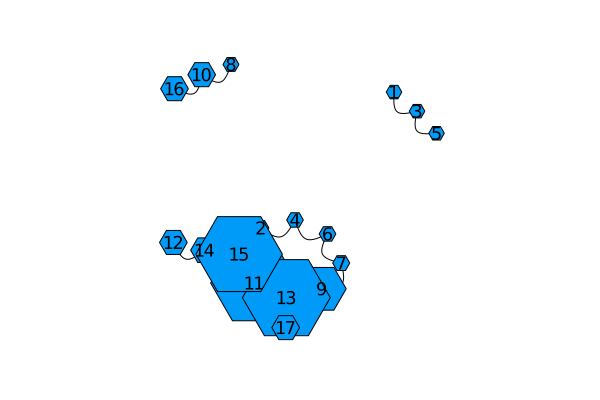

In [286]:
for k in Primes.primes(3, min(seqlen, 31))
    graph = Eisenia.KmerGraph(BioSequences.DNAMer{k}, observations)
    display(Eisenia.plot_graph(graph))
end

Let's go with k = 3. k = 5 seems like it has lots of disjointed tips and k=7 fragments the graphs to the point that there are no overlaps. This suggests that the smallest possible k that can separate signal from noise is ideal

In [287]:
k = 3
graph = Eisenia.KmerGraph(BioSequences.DNAMer{k}, observations)

Eisenia.KmerGraph{BioSequences.Mer{BioSequences.DNAAlphabet{2},3}}({9, 12} undirected simple Int64 graph, Dict{LightGraphs.SimpleGraphs.SimpleEdge{Int64},Array{Eisenia.EdgeEvidence,1}}(Edge 3 => 6 => [Eisenia.EdgeEvidence(6, 3), Eisenia.EdgeEvidence(31, 8), Eisenia.EdgeEvidence(34, 8), Eisenia.EdgeEvidence(35, 4), Eisenia.EdgeEvidence(43, 3), Eisenia.EdgeEvidence(90, 4), Eisenia.EdgeEvidence(94, 7)],Edge 5 => 9 => [Eisenia.EdgeEvidence(17, 4), Eisenia.EdgeEvidence(88, 4)],Edge 7 => 8 => [Eisenia.EdgeEvidence(48, 8), Eisenia.EdgeEvidence(77, 6), Eisenia.EdgeEvidence(82, 8)],Edge 3 => 9 => [Eisenia.EdgeEvidence(33, 3)],Edge 3 => 4 => [Eisenia.EdgeEvidence(1, 1), Eisenia.EdgeEvidence(2, 7), Eisenia.EdgeEvidence(3, 7), Eisenia.EdgeEvidence(4, 1), Eisenia.EdgeEvidence(5, 1), Eisenia.EdgeEvidence(6, 2), Eisenia.EdgeEvidence(7, 7), Eisenia.EdgeEvidence(8, 1), Eisenia.EdgeEvidence(9, 1), Eisenia.EdgeEvidence(10, 7)  …  Eisenia.EdgeEvidence(90, 3), Eisenia.EdgeEvidence(91, 1), Eisenia.EdgeEvide

In [288]:
total_edits_accepted = 0
total_bases_evaluated = 0

0

In [289]:
for observation in observations
    total_bases_evaluated += length(observation)
    optimal_path, edit_distance, relative_likelihood = Eisenia.viterbi_maximum_likelihood_path(graph, observation, error_rate)
    total_edits_accepted += edit_distance
    maximum_likelihood_observation = Eisenia.oriented_path_to_sequence(optimal_path, graph.kmers)
    @show my_isequal(maximum_likelihood_observation, first(sequences))
    push!(maximum_likelihood_observations, maximum_likelihood_observation)
end

my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = false
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = false
my_isequal(maximum_likelihood_observation, first(sequences)) = false
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, fi

In [290]:
total_edits_accepted / total_bases_evaluated

0.0020100502512562816

In [291]:
observations = maximum_likelihood_observations
maximum_likelihood_observations = BioSequences.LongDNASeq[]

BioSequences.LongSequence{BioSequences.DNAAlphabet{4}}[]

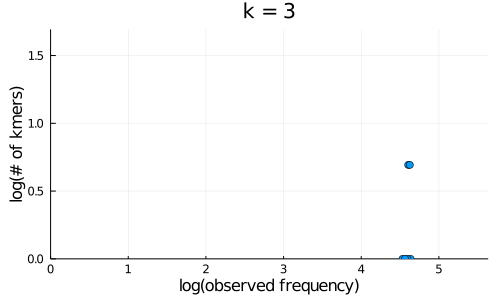

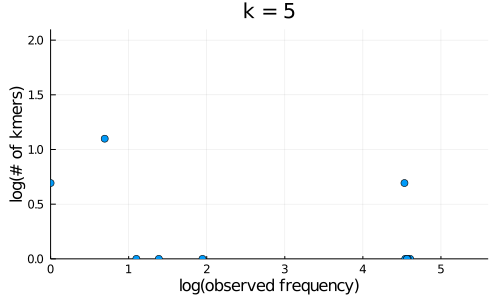

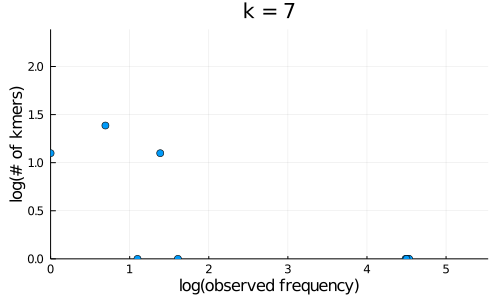

In [292]:
for k in Primes.primes(3, min(seqlen, 31))
    counts = collect(values(Eisenia.count_kmers(BioSequences.DNAMer{k}, observations)))
    display(Eisenia.plot_kmer_frequency_spectra(counts, title = "k = $k", size = (500, 300)))
end

These all seem fine, let's see what the graphs look like for each

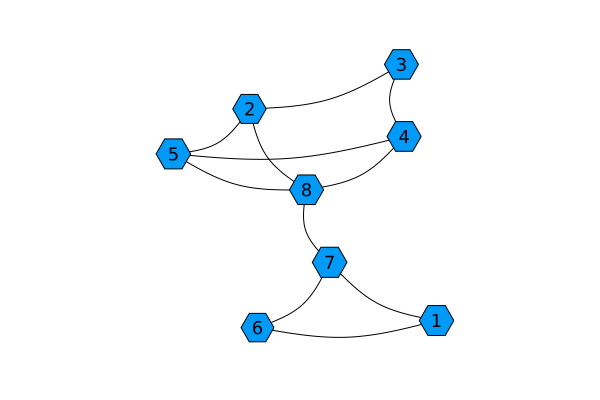

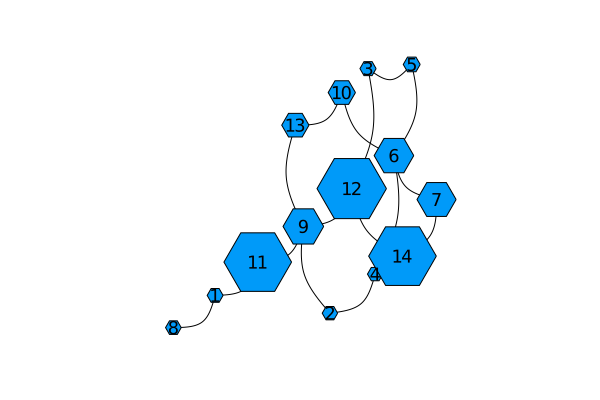

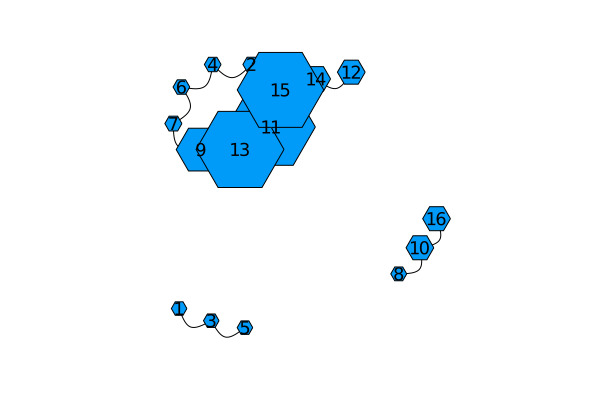

In [293]:
for k in Primes.primes(3, min(seqlen, 31))
    graph = Eisenia.KmerGraph(BioSequences.DNAMer{k}, observations)
    display(Eisenia.plot_graph(graph))
end

Let's go with k = 3. k = 5 seems like it has lots of disjointed tips and k=7 fragments the graphs to the point that there are no overlaps. This suggests that the smallest possible k that can separate signal from noise is ideal

In [294]:
k = 3
graph = Eisenia.KmerGraph(BioSequences.DNAMer{k}, observations)

Eisenia.KmerGraph{BioSequences.Mer{BioSequences.DNAAlphabet{2},3}}({8, 11} undirected simple Int64 graph, Dict{LightGraphs.SimpleGraphs.SimpleEdge{Int64},Array{Eisenia.EdgeEvidence,1}}(Edge 7 => 8 => [Eisenia.EdgeEvidence(1, 5), Eisenia.EdgeEvidence(2, 3), Eisenia.EdgeEvidence(3, 3), Eisenia.EdgeEvidence(4, 5), Eisenia.EdgeEvidence(5, 5), Eisenia.EdgeEvidence(6, 5), Eisenia.EdgeEvidence(7, 3), Eisenia.EdgeEvidence(8, 5), Eisenia.EdgeEvidence(9, 5), Eisenia.EdgeEvidence(10, 3)  …  Eisenia.EdgeEvidence(91, 5), Eisenia.EdgeEvidence(92, 3), Eisenia.EdgeEvidence(93, 3), Eisenia.EdgeEvidence(94, 2), Eisenia.EdgeEvidence(95, 3), Eisenia.EdgeEvidence(96, 3), Eisenia.EdgeEvidence(97, 3), Eisenia.EdgeEvidence(98, 5), Eisenia.EdgeEvidence(99, 3), Eisenia.EdgeEvidence(100, 3)],Edge 3 => 4 => [Eisenia.EdgeEvidence(1, 2), Eisenia.EdgeEvidence(2, 6), Eisenia.EdgeEvidence(3, 6), Eisenia.EdgeEvidence(4, 2), Eisenia.EdgeEvidence(5, 2), Eisenia.EdgeEvidence(6, 1), Eisenia.EdgeEvidence(7, 6), Eisenia.Edge

In [295]:
total_edits_accepted = 0
total_bases_evaluated = 0

0

In [296]:
for observation in observations
    total_bases_evaluated += length(observation)
    optimal_path, edit_distance, relative_likelihood = Eisenia.viterbi_maximum_likelihood_path(graph, observation, error_rate)
    total_edits_accepted += edit_distance
    maximum_likelihood_observation = Eisenia.oriented_path_to_sequence(optimal_path, graph.kmers)
    @show my_isequal(maximum_likelihood_observation, first(sequences))
    push!(maximum_likelihood_observations, maximum_likelihood_observation)
end

my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = false
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = false
my_isequal(maximum_likelihood_observation, first(sequences)) = false
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, fi

In [297]:
total_edits_accepted / total_bases_evaluated

0.0

In [298]:
observations = maximum_likelihood_observations
maximum_likelihood_observations = BioSequences.LongDNASeq[]

BioSequences.LongSequence{BioSequences.DNAAlphabet{4}}[]

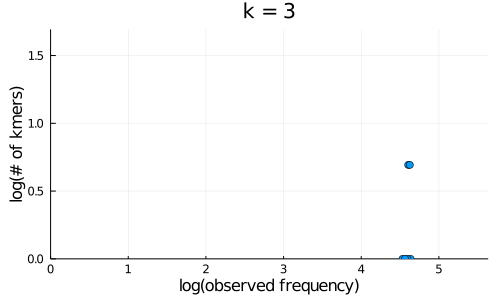

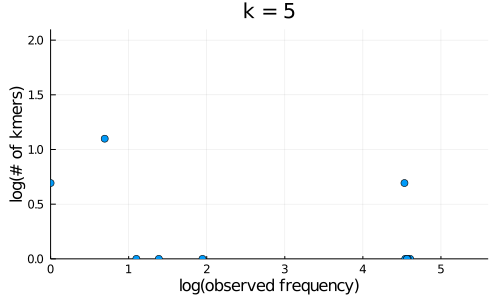

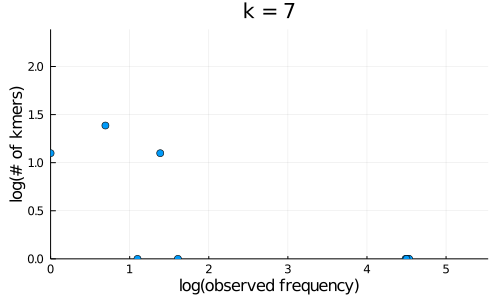

In [299]:
for k in Primes.primes(3, min(seqlen, 31))
    counts = collect(values(Eisenia.count_kmers(BioSequences.DNAMer{k}, observations)))
    display(Eisenia.plot_kmer_frequency_spectra(counts, title = "k = $k", size = (500, 300)))
end

These all seem fine, let's see what the graphs look like for each

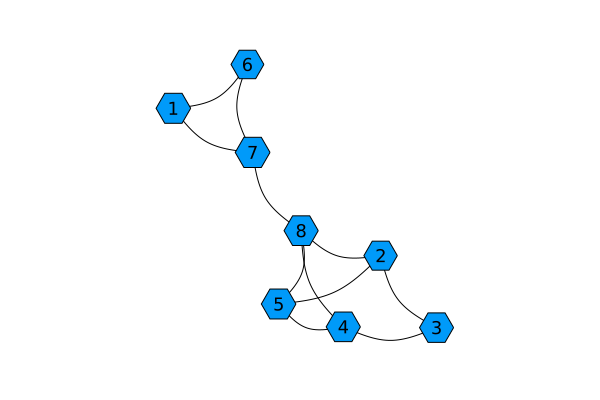

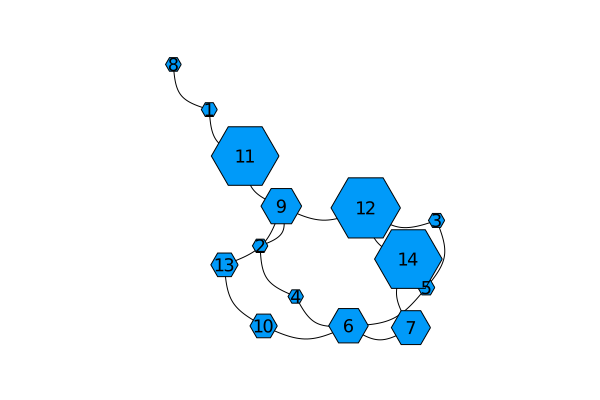

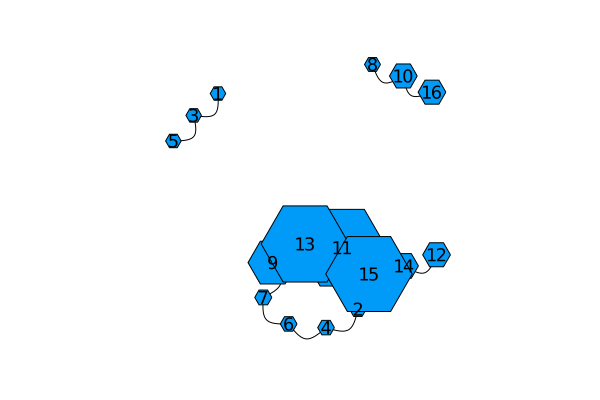

In [300]:
for k in Primes.primes(3, min(seqlen, 31))
    graph = Eisenia.KmerGraph(BioSequences.DNAMer{k}, observations)
    display(Eisenia.plot_graph(graph))
end

Let's go with k = 3. k = 5 seems like it has lots of disjointed tips and k=7 fragments the graphs to the point that there are no overlaps. This suggests that the smallest possible k that can separate signal from noise is ideal

In [301]:
k = 5
graph = Eisenia.KmerGraph(BioSequences.DNAMer{k}, observations)

Eisenia.KmerGraph{BioSequences.Mer{BioSequences.DNAAlphabet{2},5}}({14, 16} undirected simple Int64 graph, Dict{LightGraphs.SimpleGraphs.SimpleEdge{Int64},Array{Eisenia.EdgeEvidence,1}}(Edge 9 => 12 => [Eisenia.EdgeEvidence(1, 4), Eisenia.EdgeEvidence(2, 2), Eisenia.EdgeEvidence(3, 2), Eisenia.EdgeEvidence(4, 4), Eisenia.EdgeEvidence(5, 4), Eisenia.EdgeEvidence(6, 4), Eisenia.EdgeEvidence(7, 2), Eisenia.EdgeEvidence(8, 4), Eisenia.EdgeEvidence(9, 4), Eisenia.EdgeEvidence(10, 2)  …  Eisenia.EdgeEvidence(91, 4), Eisenia.EdgeEvidence(92, 2), Eisenia.EdgeEvidence(93, 2), Eisenia.EdgeEvidence(94, 1), Eisenia.EdgeEvidence(95, 2), Eisenia.EdgeEvidence(96, 2), Eisenia.EdgeEvidence(97, 2), Eisenia.EdgeEvidence(98, 4), Eisenia.EdgeEvidence(99, 2), Eisenia.EdgeEvidence(100, 2)],Edge 4 => 6 => [Eisenia.EdgeEvidence(33, 1)],Edge 10 => 13 => [Eisenia.EdgeEvidence(17, 3), Eisenia.EdgeEvidence(88, 3)],Edge 6 => 10 => [Eisenia.EdgeEvidence(17, 4), Eisenia.EdgeEvidence(88, 4)],Edge 9 => 13 => [Eisenia.E

In [302]:
total_edits_accepted = 0
total_bases_evaluated = 0

0

In [303]:
for observation in observations
    total_bases_evaluated += length(observation)
    optimal_path, edit_distance, relative_likelihood = Eisenia.viterbi_maximum_likelihood_path(graph, observation, error_rate)
    total_edits_accepted += edit_distance
    maximum_likelihood_observation = Eisenia.oriented_path_to_sequence(optimal_path, graph.kmers)
    @show my_isequal(maximum_likelihood_observation, first(sequences))
    push!(maximum_likelihood_observations, maximum_likelihood_observation)
end

my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = false
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = false
my_isequal(maximum_likelihood_observation, first(sequences)) = false
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, fi

In [304]:
total_edits_accepted / total_bases_evaluated

0.011055276381909548

In [305]:
observations = maximum_likelihood_observations
maximum_likelihood_observations = BioSequences.LongDNASeq[]

BioSequences.LongSequence{BioSequences.DNAAlphabet{4}}[]

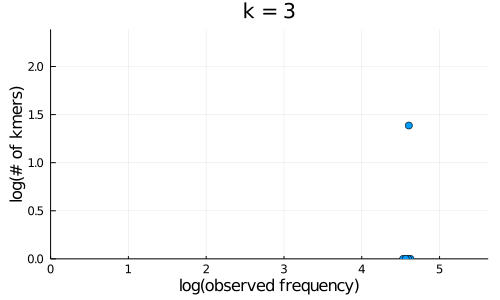

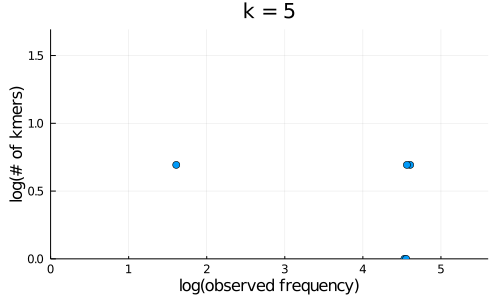

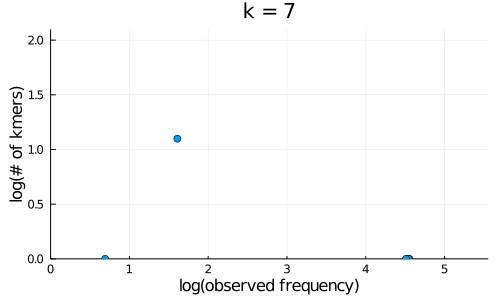

In [306]:
for k in Primes.primes(3, min(seqlen, 31))
    counts = collect(values(Eisenia.count_kmers(BioSequences.DNAMer{k}, observations)))
    display(Eisenia.plot_kmer_frequency_spectra(counts, title = "k = $k", size = (500, 300)))
end

These all seem fine, let's see what the graphs look like for each

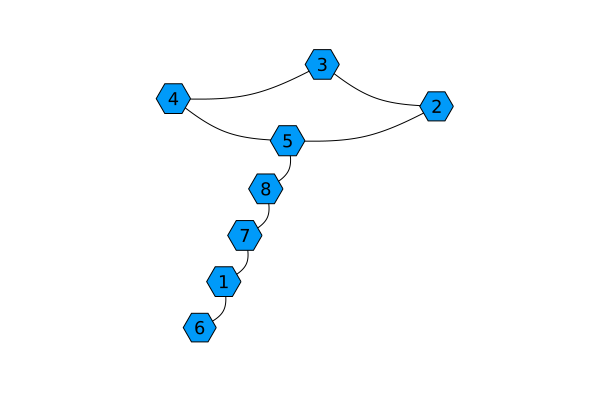

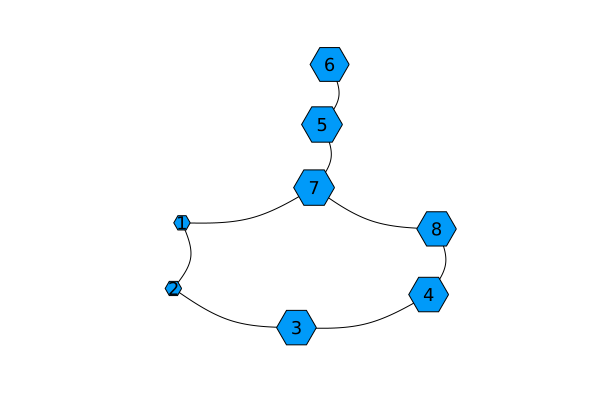

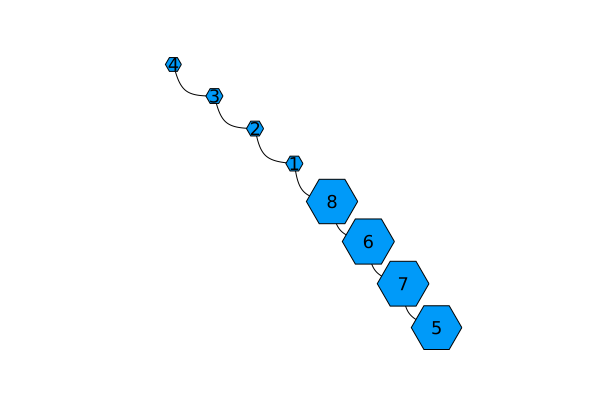

In [307]:
for k in Primes.primes(3, min(seqlen, 31))
    graph = Eisenia.KmerGraph(BioSequences.DNAMer{k}, observations)
    display(Eisenia.plot_graph(graph))
end

Let's go with k = 3. k = 5 seems like it has lots of disjointed tips and k=7 fragments the graphs to the point that there are no overlaps. This suggests that the smallest possible k that can separate signal from noise is ideal

In [308]:
k = 5
graph = Eisenia.KmerGraph(BioSequences.DNAMer{k}, observations)

Eisenia.KmerGraph{BioSequences.Mer{BioSequences.DNAAlphabet{2},5}}({8, 8} undirected simple Int64 graph, Dict{LightGraphs.SimpleGraphs.SimpleEdge{Int64},Array{Eisenia.EdgeEvidence,1}}(Edge 7 => 8 => [Eisenia.EdgeEvidence(1, 3), Eisenia.EdgeEvidence(2, 3), Eisenia.EdgeEvidence(3, 3), Eisenia.EdgeEvidence(4, 3), Eisenia.EdgeEvidence(5, 3), Eisenia.EdgeEvidence(7, 3), Eisenia.EdgeEvidence(8, 3), Eisenia.EdgeEvidence(9, 3), Eisenia.EdgeEvidence(10, 3), Eisenia.EdgeEvidence(11, 2)  …  Eisenia.EdgeEvidence(91, 3), Eisenia.EdgeEvidence(92, 3), Eisenia.EdgeEvidence(93, 3), Eisenia.EdgeEvidence(94, 2), Eisenia.EdgeEvidence(95, 3), Eisenia.EdgeEvidence(96, 3), Eisenia.EdgeEvidence(97, 3), Eisenia.EdgeEvidence(98, 3), Eisenia.EdgeEvidence(99, 3), Eisenia.EdgeEvidence(100, 3)],Edge 1 => 2 => [Eisenia.EdgeEvidence(6, 2), Eisenia.EdgeEvidence(33, 2), Eisenia.EdgeEvidence(35, 3), Eisenia.EdgeEvidence(43, 2), Eisenia.EdgeEvidence(90, 3)],Edge 1 => 7 => [Eisenia.EdgeEvidence(6, 3), Eisenia.EdgeEvidence

In [309]:
total_edits_accepted = 0
total_bases_evaluated = 0

0

In [310]:
for observation in observations
    total_bases_evaluated += length(observation)
    optimal_path, edit_distance, relative_likelihood = Eisenia.viterbi_maximum_likelihood_path(graph, observation, error_rate)
    total_edits_accepted += edit_distance
    maximum_likelihood_observation = Eisenia.oriented_path_to_sequence(optimal_path, graph.kmers)
    @show my_isequal(maximum_likelihood_observation, first(sequences))
    push!(maximum_likelihood_observations, maximum_likelihood_observation)
end

my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = false
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = false
my_isequal(maximum_likelihood_observation, first(sequences)) = false
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, fi

In [311]:
total_edits_accepted / total_bases_evaluated

0.0

In [312]:
observations = maximum_likelihood_observations
maximum_likelihood_observations = BioSequences.LongDNASeq[]

BioSequences.LongSequence{BioSequences.DNAAlphabet{4}}[]

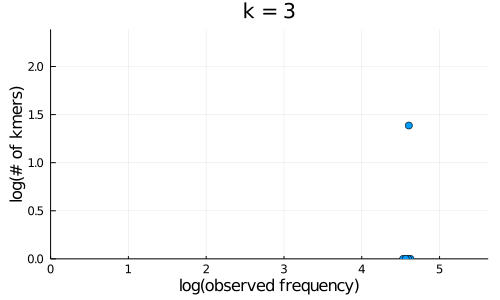

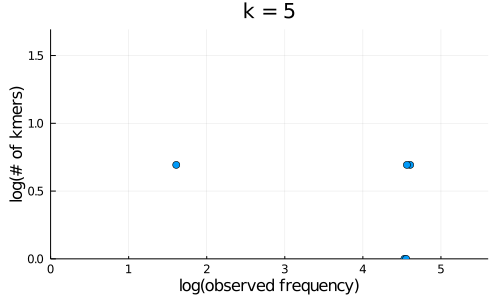

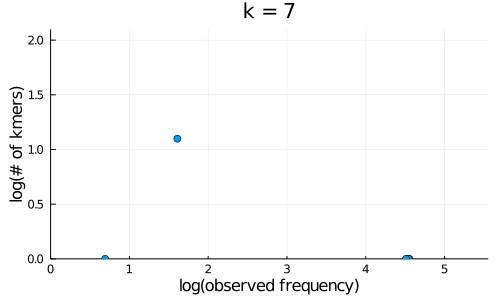

In [313]:
for k in Primes.primes(3, min(seqlen, 31))
    counts = collect(values(Eisenia.count_kmers(BioSequences.DNAMer{k}, observations)))
    display(Eisenia.plot_kmer_frequency_spectra(counts, title = "k = $k", size = (500, 300)))
end

These all seem fine, let's see what the graphs look like for each

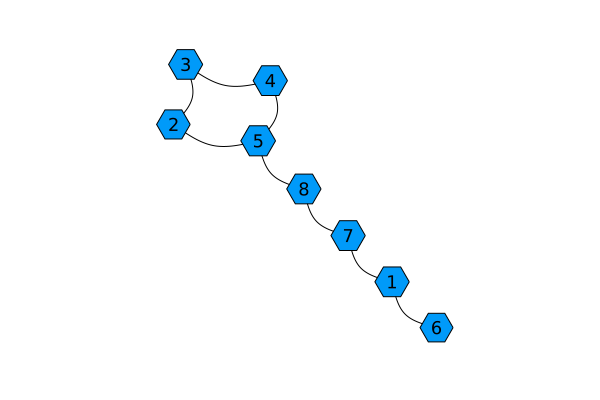

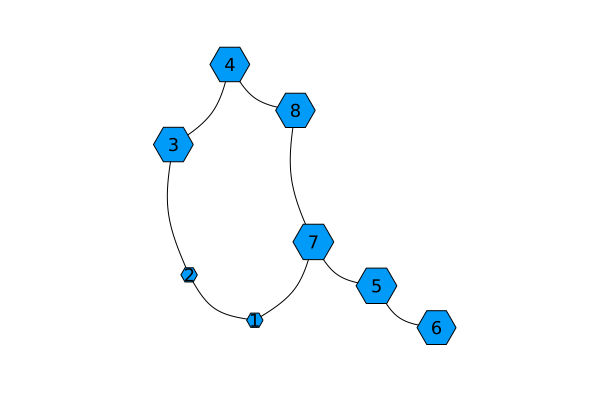

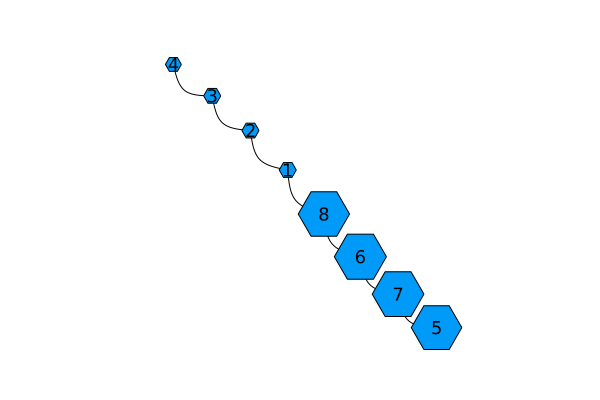

In [314]:
for k in Primes.primes(3, min(seqlen, 31))
    graph = Eisenia.KmerGraph(BioSequences.DNAMer{k}, observations)
    display(Eisenia.plot_graph(graph))
end

Let's go with k = 3. k = 5 seems like it has lots of disjointed tips and k=7 fragments the graphs to the point that there are no overlaps. This suggests that the smallest possible k that can separate signal from noise is ideal

In [315]:
k = 7
graph = Eisenia.KmerGraph(BioSequences.DNAMer{k}, observations)

Eisenia.KmerGraph{BioSequences.Mer{BioSequences.DNAAlphabet{2},7}}({8, 7} undirected simple Int64 graph, Dict{LightGraphs.SimpleGraphs.SimpleEdge{Int64},Array{Eisenia.EdgeEvidence,1}}(Edge 6 => 7 => [Eisenia.EdgeEvidence(1, 2), Eisenia.EdgeEvidence(2, 2), Eisenia.EdgeEvidence(3, 2), Eisenia.EdgeEvidence(4, 2), Eisenia.EdgeEvidence(5, 2), Eisenia.EdgeEvidence(7, 2), Eisenia.EdgeEvidence(8, 2), Eisenia.EdgeEvidence(9, 2), Eisenia.EdgeEvidence(10, 2), Eisenia.EdgeEvidence(11, 1)  …  Eisenia.EdgeEvidence(91, 2), Eisenia.EdgeEvidence(92, 2), Eisenia.EdgeEvidence(93, 2), Eisenia.EdgeEvidence(94, 1), Eisenia.EdgeEvidence(95, 2), Eisenia.EdgeEvidence(96, 2), Eisenia.EdgeEvidence(97, 2), Eisenia.EdgeEvidence(98, 2), Eisenia.EdgeEvidence(99, 2), Eisenia.EdgeEvidence(100, 2)],Edge 1 => 2 => [Eisenia.EdgeEvidence(6, 2), Eisenia.EdgeEvidence(33, 2), Eisenia.EdgeEvidence(35, 3), Eisenia.EdgeEvidence(43, 2), Eisenia.EdgeEvidence(90, 3)],Edge 1 => 8 => [Eisenia.EdgeEvidence(6, 3), Eisenia.EdgeEvidence

In [316]:
total_edits_accepted = 0
total_bases_evaluated = 0

0

In [317]:
for observation in observations
    total_bases_evaluated += length(observation)
    optimal_path, edit_distance, relative_likelihood = Eisenia.viterbi_maximum_likelihood_path(graph, observation, error_rate)
    total_edits_accepted += edit_distance
    maximum_likelihood_observation = Eisenia.oriented_path_to_sequence(optimal_path, graph.kmers)
    @show my_isequal(maximum_likelihood_observation, first(sequences))
    push!(maximum_likelihood_observations, maximum_likelihood_observation)
end

my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = false
my_isequal(maximum_likelihood_observation, first(sequences)) = false
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, fir

In [318]:
total_edits_accepted / total_bases_evaluated

0.0030303030303030303

In [319]:
observations = maximum_likelihood_observations
maximum_likelihood_observations = BioSequences.LongDNASeq[]

BioSequences.LongSequence{BioSequences.DNAAlphabet{4}}[]

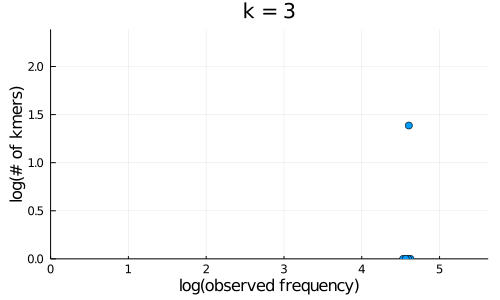

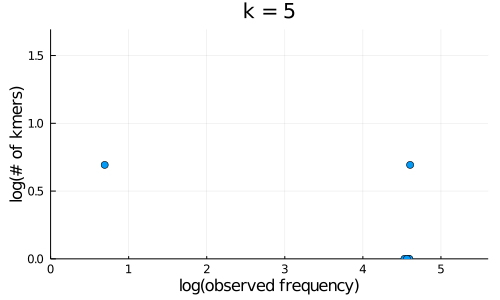

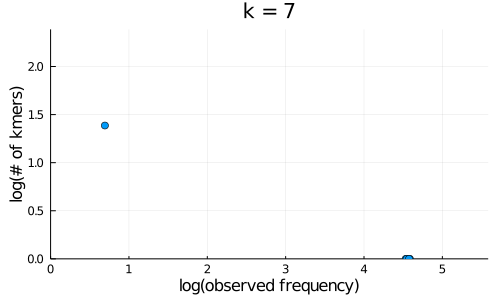

In [320]:
for k in Primes.primes(3, min(seqlen, 31))
    counts = collect(values(Eisenia.count_kmers(BioSequences.DNAMer{k}, observations)))
    display(Eisenia.plot_kmer_frequency_spectra(counts, title = "k = $k", size = (500, 300)))
end

These all seem fine, let's see what the graphs look like for each

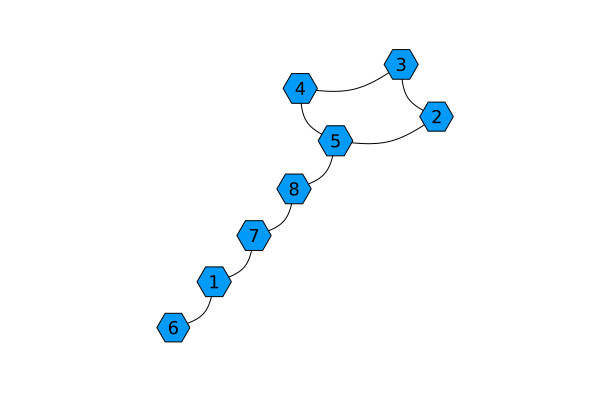

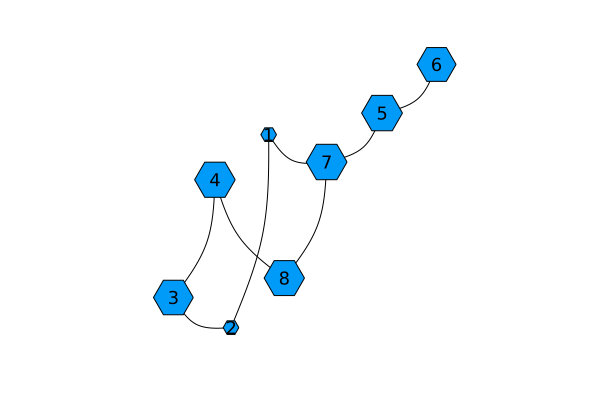

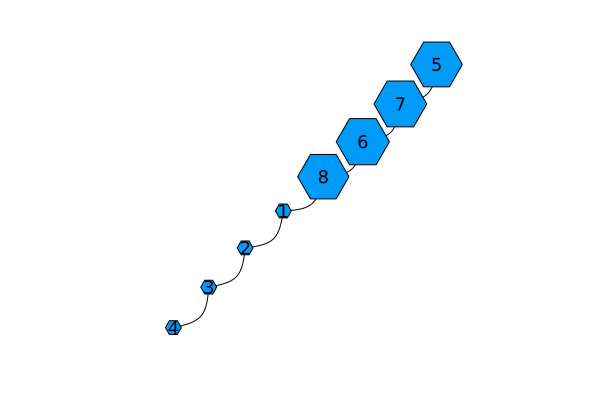

In [321]:
for k in Primes.primes(3, min(seqlen, 31))
    graph = Eisenia.KmerGraph(BioSequences.DNAMer{k}, observations)
    display(Eisenia.plot_graph(graph))
end

Let's go with k = 3. k = 5 seems like it has lots of disjointed tips and k=7 fragments the graphs to the point that there are no overlaps. This suggests that the smallest possible k that can separate signal from noise is ideal

In [322]:
k = 7
graph = Eisenia.KmerGraph(BioSequences.DNAMer{k}, observations)

Eisenia.KmerGraph{BioSequences.Mer{BioSequences.DNAAlphabet{2},7}}({8, 7} undirected simple Int64 graph, Dict{LightGraphs.SimpleGraphs.SimpleEdge{Int64},Array{Eisenia.EdgeEvidence,1}}(Edge 6 => 7 => [Eisenia.EdgeEvidence(1, 2), Eisenia.EdgeEvidence(2, 2), Eisenia.EdgeEvidence(3, 2), Eisenia.EdgeEvidence(4, 2), Eisenia.EdgeEvidence(5, 2), Eisenia.EdgeEvidence(6, 2), Eisenia.EdgeEvidence(7, 2), Eisenia.EdgeEvidence(8, 2), Eisenia.EdgeEvidence(9, 2), Eisenia.EdgeEvidence(10, 2)  …  Eisenia.EdgeEvidence(91, 2), Eisenia.EdgeEvidence(92, 2), Eisenia.EdgeEvidence(93, 2), Eisenia.EdgeEvidence(94, 1), Eisenia.EdgeEvidence(95, 2), Eisenia.EdgeEvidence(96, 2), Eisenia.EdgeEvidence(97, 2), Eisenia.EdgeEvidence(98, 2), Eisenia.EdgeEvidence(99, 2), Eisenia.EdgeEvidence(100, 2)],Edge 1 => 2 => [Eisenia.EdgeEvidence(35, 3), Eisenia.EdgeEvidence(90, 3)],Edge 1 => 8 => [Eisenia.EdgeEvidence(35, 4), Eisenia.EdgeEvidence(90, 4)],Edge 6 => 8 => [Eisenia.EdgeEvidence(1, 3), Eisenia.EdgeEvidence(2, 1), Eisen

In [323]:
total_edits_accepted = 0
total_bases_evaluated = 0

0

In [324]:
for observation in observations
    total_bases_evaluated += length(observation)
    optimal_path, edit_distance, relative_likelihood = Eisenia.viterbi_maximum_likelihood_path(graph, observation, error_rate)
    total_edits_accepted += edit_distance
    maximum_likelihood_observation = Eisenia.oriented_path_to_sequence(optimal_path, graph.kmers)
    @show my_isequal(maximum_likelihood_observation, first(sequences))
    push!(maximum_likelihood_observations, maximum_likelihood_observation)
end

my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = false
my_isequal(maximum_likelihood_observation, first(sequences)) = false
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, fir

In [325]:
total_edits_accepted / total_bases_evaluated

0.012121212121212121

In [326]:
observations = maximum_likelihood_observations
maximum_likelihood_observations = BioSequences.LongDNASeq[]

BioSequences.LongSequence{BioSequences.DNAAlphabet{4}}[]

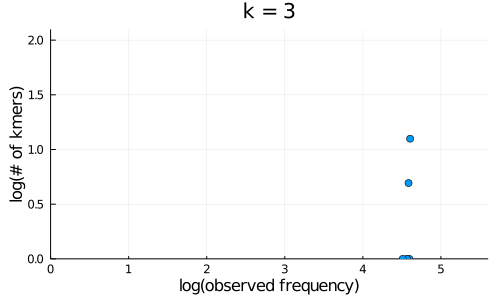

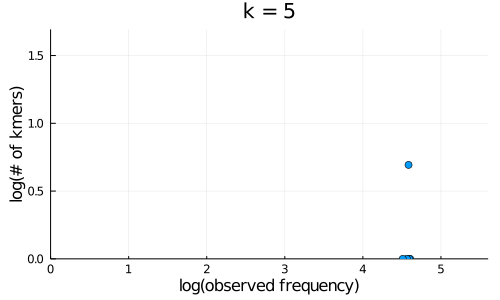

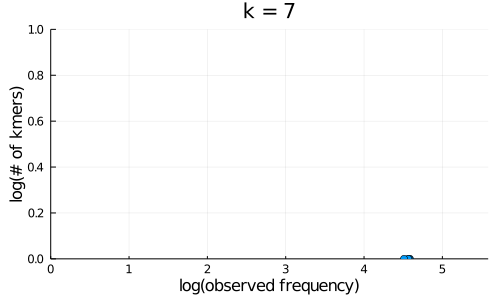

In [327]:
for k in Primes.primes(3, min(seqlen, 31))
    counts = collect(values(Eisenia.count_kmers(BioSequences.DNAMer{k}, observations)))
    display(Eisenia.plot_kmer_frequency_spectra(counts, title = "k = $k", size = (500, 300)))
end

These all seem fine, let's see what the graphs look like for each

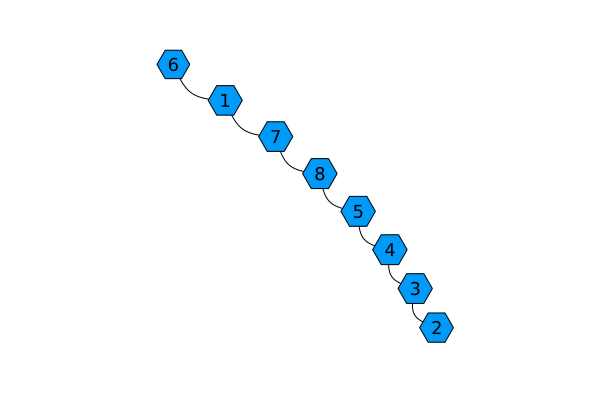

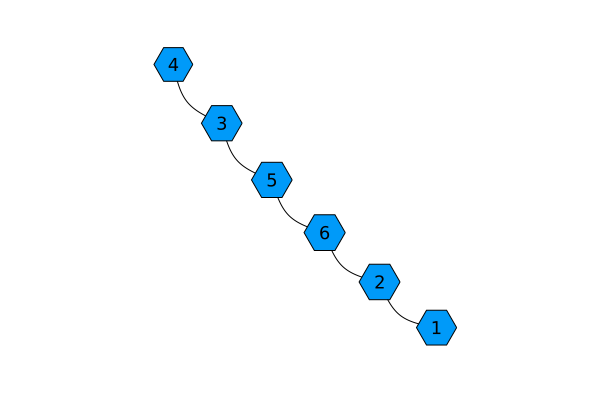

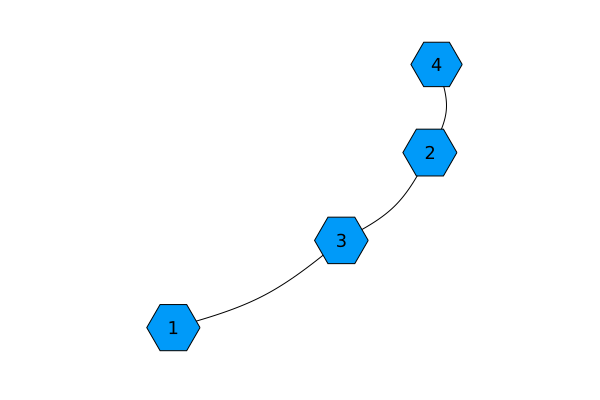

In [328]:
for k in Primes.primes(3, min(seqlen, 31))
    graph = Eisenia.KmerGraph(BioSequences.DNAMer{k}, observations)
    display(Eisenia.plot_graph(graph))
end

Let's go with k = 3. k = 5 seems like it has lots of disjointed tips and k=7 fragments the graphs to the point that there are no overlaps. This suggests that the smallest possible k that can separate signal from noise is ideal

In [329]:
k = 7
graph = Eisenia.KmerGraph(BioSequences.DNAMer{k}, observations)

Eisenia.KmerGraph{BioSequences.Mer{BioSequences.DNAAlphabet{2},7}}({4, 3} undirected simple Int64 graph, Dict{LightGraphs.SimpleGraphs.SimpleEdge{Int64},Array{Eisenia.EdgeEvidence,1}}(Edge 2 => 4 => [Eisenia.EdgeEvidence(1, 3), Eisenia.EdgeEvidence(2, 1), Eisenia.EdgeEvidence(3, 1), Eisenia.EdgeEvidence(4, 3), Eisenia.EdgeEvidence(5, 3), Eisenia.EdgeEvidence(6, 3), Eisenia.EdgeEvidence(7, 1), Eisenia.EdgeEvidence(8, 3), Eisenia.EdgeEvidence(9, 3), Eisenia.EdgeEvidence(10, 1)  …  Eisenia.EdgeEvidence(89, 3), Eisenia.EdgeEvidence(91, 3), Eisenia.EdgeEvidence(92, 1), Eisenia.EdgeEvidence(93, 1), Eisenia.EdgeEvidence(95, 1), Eisenia.EdgeEvidence(96, 1), Eisenia.EdgeEvidence(97, 1), Eisenia.EdgeEvidence(98, 3), Eisenia.EdgeEvidence(99, 1), Eisenia.EdgeEvidence(100, 1)],Edge 1 => 3 => [Eisenia.EdgeEvidence(1, 1), Eisenia.EdgeEvidence(2, 3), Eisenia.EdgeEvidence(3, 3), Eisenia.EdgeEvidence(4, 1), Eisenia.EdgeEvidence(5, 1), Eisenia.EdgeEvidence(6, 1), Eisenia.EdgeEvidence(7, 3), Eisenia.EdgeE

In [330]:
total_edits_accepted = 0
total_bases_evaluated = 0

0

In [331]:
for observation in observations
    total_bases_evaluated += length(observation)
    optimal_path, edit_distance, relative_likelihood = Eisenia.viterbi_maximum_likelihood_path(graph, observation, error_rate)
    total_edits_accepted += edit_distance
    maximum_likelihood_observation = Eisenia.oriented_path_to_sequence(optimal_path, graph.kmers)
    @show my_isequal(maximum_likelihood_observation, first(sequences))
    push!(maximum_likelihood_observations, maximum_likelihood_observation)
end

my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = false
my_isequal(maximum_likelihood_observation, first(sequences)) = false
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, first(sequences)) = true
my_isequal(maximum_likelihood_observation, fir

In [332]:
total_edits_accepted / total_bases_evaluated

0.0

In [333]:
observations

100-element Array{BioSequences.LongSequence{BioSequences.DNAAlphabet{4}},1}:
 CCTGGGACGA
 TCGTCCCAGG
 TCGTCCCAGG
 CCTGGGACGA
 CCTGGGACGA
 CCTGGGACGA
 TCGTCCCAGG
 CCTGGGACGA
 CCTGGGACGA
 TCGTCCCAGG
 CGTCCCAGG
 TCGTCCCAG
 TCGTCCCAGG
 ⋮
 CCTGGGACGA
 TCCCAGG
 CCTGGGACGA
 TCGTCCCAG
 TCGTCCCAGG
 CGTCCCAGG
 TCGTCCCAGG
 TCGTCCCAGG
 TCGTCCCAGG
 CCTGGGACGA
 TCGTCCCAGG
 TCGTCCCAGG

In [334]:
observations = maximum_likelihood_observations
maximum_likelihood_observations = BioSequences.LongDNASeq[]

BioSequences.LongSequence{BioSequences.DNAAlphabet{4}}[]